In [136]:
#imports

import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [137]:
df = pd.read_csv('memory_csv.csv')

In [138]:
df.shape

(1700, 32)

In [139]:
sns.set_style('whitegrid')

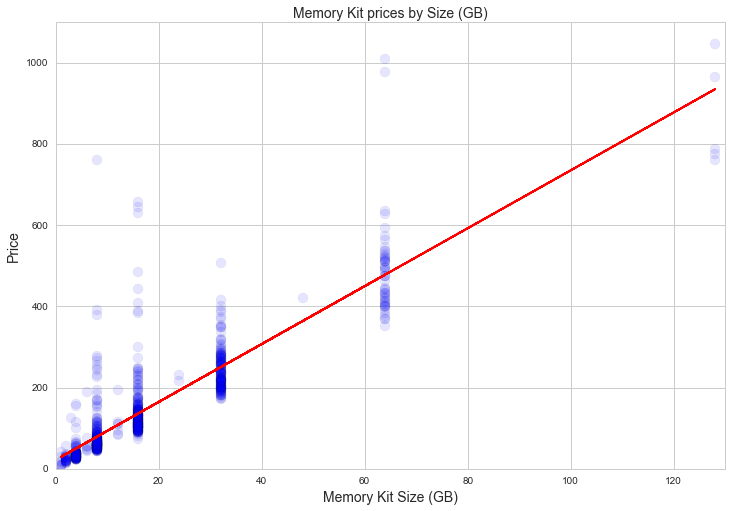

In [140]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
df1 = df[df.avg>0]
feat_cols = [u'size_gb']
X = df1[feat_cols]
y = df1.avg.reshape(df1.size_gb.shape[0],1)
lreg.fit(X, y, sample_weight=None)

#plot memory size vs. price
plt.figure(figsize=(12,8))
plt.scatter(df[df.avg>0].size_gb, df[df.avg>0].avg, s = 100, alpha=.1)
plt.axis([0,130,0,1100])
plt.title('Memory Kit prices by Size (GB)', fontsize=14)
plt.xlabel('Memory Kit Size (GB)', fontsize=14)
plt.ylabel('Price', fontsize=14)

#plot regression line
size = df1.size_gb.reshape(df1.size_gb.shape[0],1)
pred = lreg.predict(df1.size_gb.reshape(df1.size_gb.shape[0],1))
plt.plot(size ,pred, color='red')
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/memory/size_vs_price.png'))

In [141]:
lreg.score(X, y, sample_weight=None)

0.76766760582497073

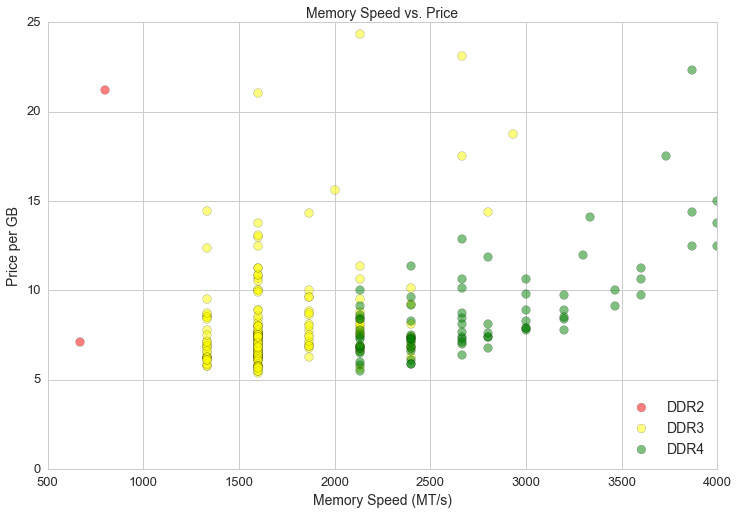

In [186]:
plt.figure(figsize=(12,8))
a=.5
s=75

ddr2_speed = df.ddr_speed[(df.ddr_type == 'DDR2')&(df.size_gb==8)&(df.ddr_speed>0)&(df.avg>0)]
ddr2_ppgb = df.ppgb[(df.ddr_type == 'DDR2')&(df.size_gb==8)&(df.ddr_speed>0)&(df.avg>0)]
plt.scatter(ddr2_speed,ddr2_ppgb,alpha = a, c='red', s=s)

ddr3_speed = df.ddr_speed[(df.ddr_type == 'DDR3')&(df.size_gb==8)&(df.ddr_speed>0)&(df.avg>0)]
ddr3_ppgb = df.ppgb[(df.ddr_type == 'DDR3')&(df.size_gb==8)&(df.ddr_speed>0)&(df.avg>0)]
plt.scatter(ddr3_speed,ddr3_ppgb,alpha = a, c='yellow', s=s)

ddr4_speed = df.ddr_speed[(df.ddr_type == 'DDR4')&(df.size_gb==8)&(df.ddr_speed>0)&(df.avg>0)]
ddr4_ppgb = df.ppgb[(df.ddr_type == 'DDR4')&(df.size_gb==8)&(df.ddr_speed>0)&(df.avg>0)]
plt.scatter(ddr4_speed,ddr4_ppgb,alpha = a, c='green', s=s)

plt.axis([500,4000,0,25])
plt.xlabel('Memory Speed (MT/s)', fontsize=14)
plt.ylabel('Price per GB', fontsize=14)
plt.title("Memory Speed vs. Price", fontsize=14)
plt.legend(['DDR2', 'DDR3', 'DDR4'], loc='lower right', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/memory/speed_vs_price.png'))

In [81]:
df1.size_gb.value_counts()

8.0      262
16.0     241
32.0     147
4.0      120
64.0      51
2.0       27
1.0        9
6.0        8
12.0       7
128.0      5
24.0       2
48.0       1
3.0        1
Name: size_gb, dtype: int64

In [ ]:
#visualization
sns.set_style('whitegrid')

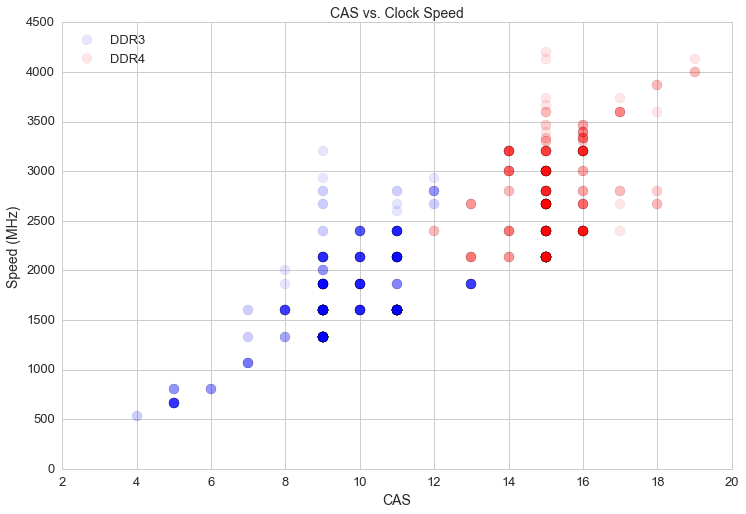

In [47]:
plt.figure(figsize=(12,8))
s = 100
a = 0.1

#plot ddr3
ddr3_cas = df.CAS[(df.is_ddr4 == False)&(df.avg>0)]
ddr3_speed = df.ddr_speed[(df.is_ddr4 == False)&(df.avg>0)]
plt.scatter(ddr3_cas,ddr3_speed, c = 'blue', s=s, alpha=a)

#plot ddr4
ddr4_cas = df.CAS[(df.is_ddr4 == True)&(df.avg>0)]
ddr4_speed = df.ddr_speed[(df.is_ddr4 == True)&(df.avg>0)]
plt.scatter(ddr4_cas,ddr4_speed, c = 'red', s = s, alpha=a)

plt.xlabel('CAS', fontsize=14)
plt.ylabel('Speed (MHz)', fontsize=14)
plt.title("CAS vs. Clock Speed", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['DDR3', 'DDR4'], loc='upper left', fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/memory/cas_vs_speed.png'))

In [154]:
df_lat = df[(df.CAS>0)&(df.ddr_speed>0)&(df.ddr_type=='DDR4')]

In [155]:
#df_lat = df[(df.CAS>0)&(df.ddr_speed>0)]

In [156]:
df_lat = df[(df.CAS>0)&(df.ddr_speed>0)]
df_lat['true_latency'] = [((x/2.)/1000.)*y for x, y in zip(df_lat.ddr_speed, df_lat.CAS)]

In [181]:
'''(2400 MT/s)/2
1200 Mhz or T/s
1/1200000000 T/s 
0.00000000083 seconds/Transfer
or 0.83 seconds per cycle
CAS latency is 17
multiply 0.83 by 17 = 14.17
frequency = 1/period'''

'(2400 MT/s)/2\n1200 Mhz or T/s\n1/1200000000 T/s \n0.00000000083 seconds/Transfer\nor 0.83 seconds per cycle\nCAS latency is 17\nmultiply 0.83 by 17 = 14.17\nfrequency = 1/period'

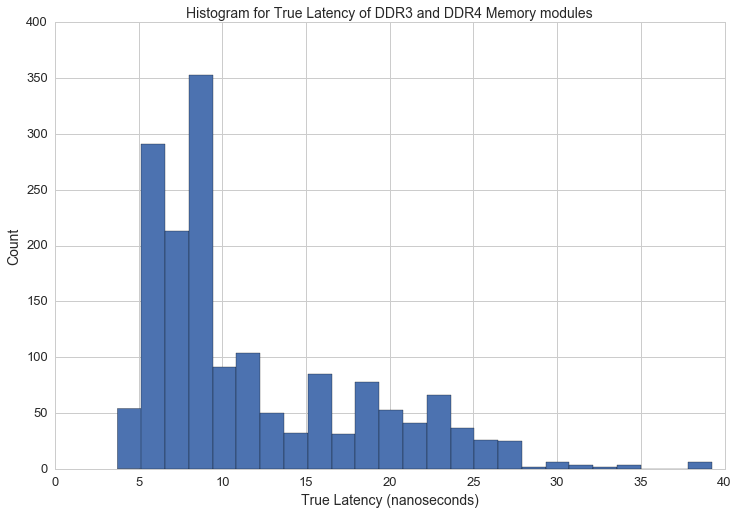

In [180]:
df_lat = df[(df.CAS>0)&(df.ddr_speed>0)&((df.ddr_type=='DDR4')|(df.ddr_type=='DDR3'))]
df_lat['true_latency'] = [((x/2.)/1000.)*y for x, y in zip(df_lat.ddr_speed, df_lat.CAS)]
df_lat.true_latency.hist(bins=25, figsize=(12,8))
plt.xlabel('True Latency (nanoseconds)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Histogram for True Latency of DDR3 and DDR4 Memory modules", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/memory/true_latency.png'))

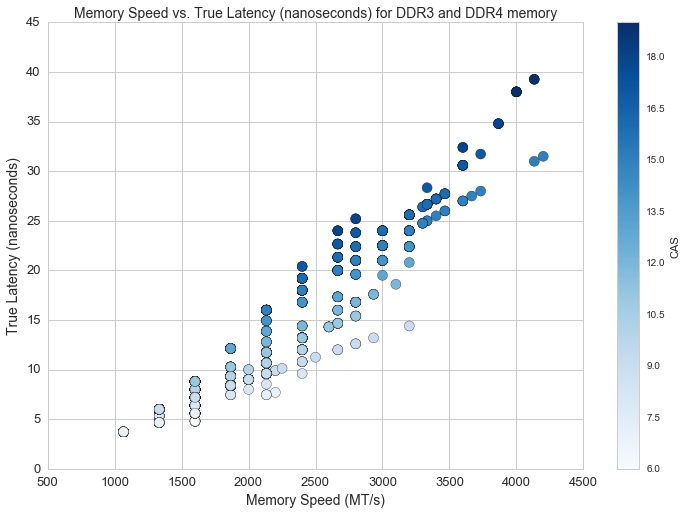

In [171]:
df_lat = df[(df.CAS>0)&(df.ddr_speed>0)&((df.ddr_type=='DDR4')|(df.ddr_type=='DDR3'))]
df_lat['true_latency'] = [((x/2.)/1000.)*y for x, y in zip(df_lat.ddr_speed, df_lat.CAS)]
plt.figure(figsize=(12,8))
plt.scatter(df_lat.ddr_speed, df_lat.true_latency, s=100, c=df_lat.CAS, cmap='Blues')
plt.colorbar(label='CAS')
plt.xlabel('Memory Speed (MT/s)', fontsize=14)
plt.ylabel('True Latency (nanoseconds)', fontsize=14)
plt.title('Memory Speed vs. True Latency (nanoseconds) for DDR3 and DDR4 memory', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/memory/speed_vs_true_latency.png'))

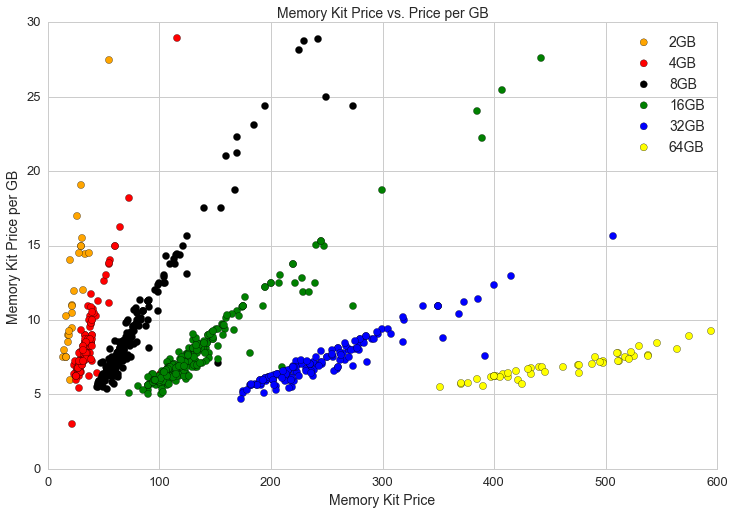

In [173]:
plt.figure(figsize=(12,8))
s_8 = df1[df1.size_gb==8]
s_16 = df1[df1.size_gb==16]
s_32 = df1[df1.size_gb==32]
s_4 = df1[df1.size_gb==4]
s_64 = df1[df1.size_gb==64]
s_2 = df1[df1.size_gb==2]

plt.scatter(s_2.avg, s_2.ppgb, c='orange', s=50)
plt.scatter(s_4.avg, s_4.ppgb, c='red', s=50)
plt.scatter(s_8.avg, s_8.ppgb, c='black', s=50)
plt.scatter(s_16.avg, s_16.ppgb, c='green', s=50)
plt.scatter(s_32.avg, s_32.ppgb, c='blue', s=50)
plt.scatter(s_64.avg, s_64.ppgb, c='yellow', s=50)


plt.axis([0,600,0,30])
plt.title('Memory Kit Price vs. Price per GB', fontsize=14)
plt.xlabel('Memory Kit Price', fontsize=14)
plt.ylabel('Memory Kit Price per GB', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['2GB','4GB', '8GB', '16GB', '32GB', '64GB'], fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/memory/price_vs_ppgb.png'))

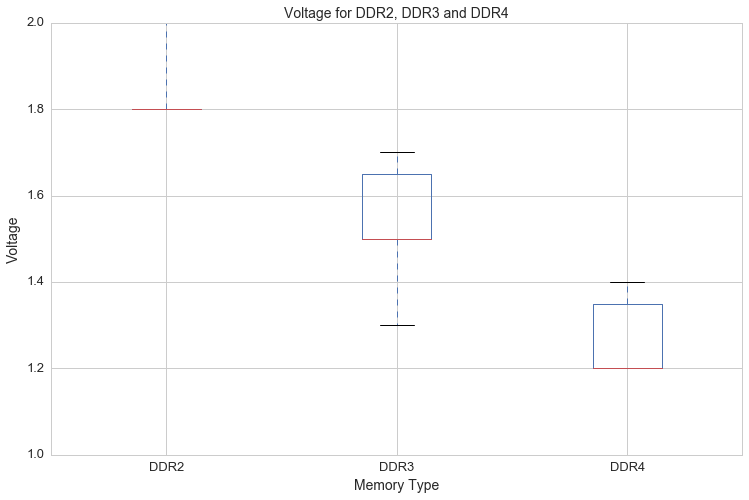

In [175]:
df3 = df[(df.voltage>0)]
df.boxplot(column='voltage', by='ddr_type', figsize=(12, 8))
plt.suptitle('')
plt.title('Voltage for DDR2, DDR3 and DDR4', fontsize=14)
plt.ylim(1,2)
plt.xlabel('Memory Type', fontsize=14)
plt.ylabel('Voltage', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/memory/voltage.png'))